# **6주차 - 2** : 온도 변화에 따른 평형 상태의 1차원 Ising 모형, Ensemble 평균

# Q2. 1차원 Ising 모형의 온도 변화에 따른 평형 상태 성질

해밀토니안이 다음과 같이 주어진 1차원 이징 모형의 평형 상태 성질을 온도를 변화하면서 살펴보려고 한다.
> $\mathcal{H}(\{s_i\}) = - (J/2) \sum_{<ij>} s_is_j = -J \sum_{i} s_is_{i+1}$



---



**(a)** $N = 5, 10, 20, 40, 80, · · · $일 때, $T /J = 0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3, 4$
각각의 온도에서 평형상태 입자당 에너지와 자화율 $ε(T_i)$, $m(T_i)$를 계산하여 $ε − T$
그래프와 $m − T$ 그래프로 나타내기.

*** 계단 함수 확인하기 !**


1. 온도 0에서 초기의 스핀 N개는 모두 1에서 시작한다.

2. **온도**에 따라서 스핀이 변화할지 OR 유지할지에 대한 확률이 있다.
> 스핀 변화 확률 : $P = e^{[-2J(s_{k-1}+s_{k+1})s_k-2Bs_k]/k_BT}$

3. 한 타임당, 스핀은 N개 중 random하게 선택된 i번째로, 총 N번 변화한다.

4. 시간 50마다 온도를 변화시키고, 그 시간이 흐름에 따라, 입자당 에너지와 자화율을 저장한다.
> 입자당 에너지 : $\frac{E(t)}{N} = \frac{H(x(t))}{N} = \frac{[-J\displaystyle\sum_{i}s_is_{i+1} -B\displaystyle\sum_{i}s_i]}{N}$

  > 자화율 : $mag(t) = \frac{1}{N}\displaystyle\sum_{i}s_i$

5. 위와 같은 step을 N을 바꿔가며 반복한다.

 < N = 5 >


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


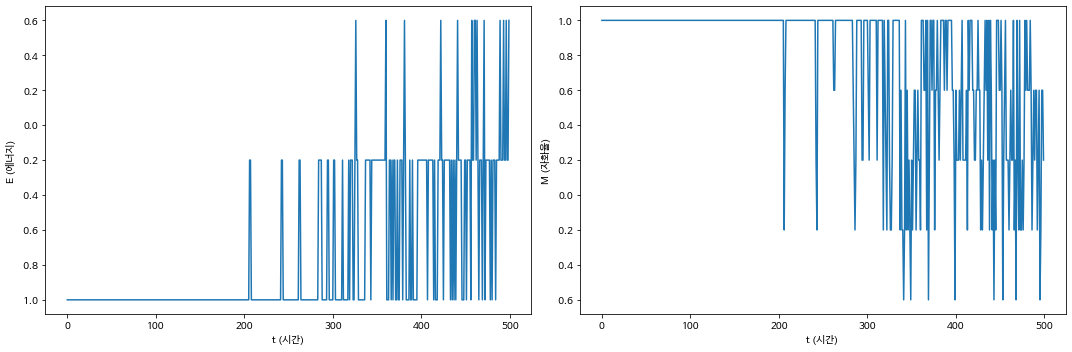

 < N = 10 >


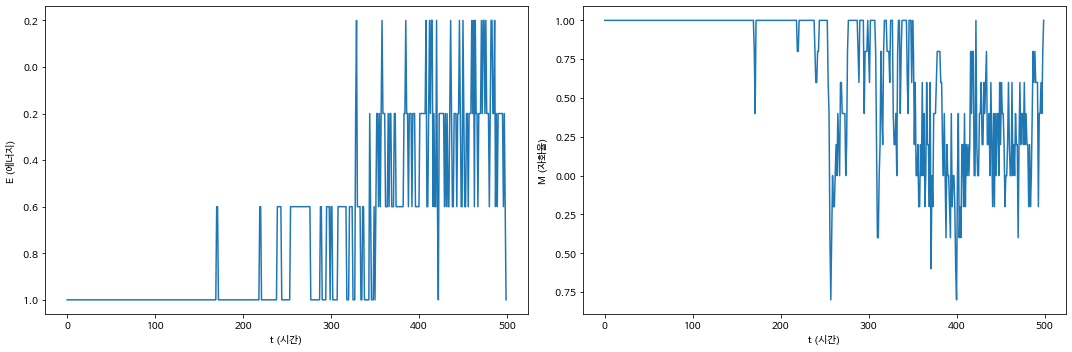

 < N = 20 >


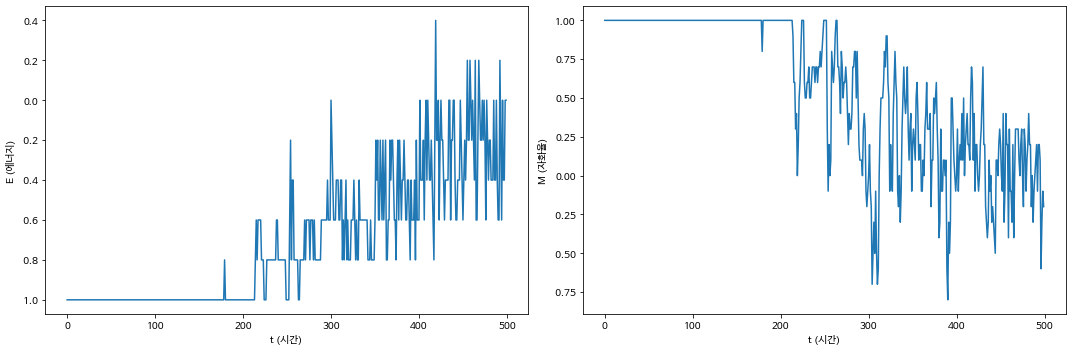

 < N = 40 >


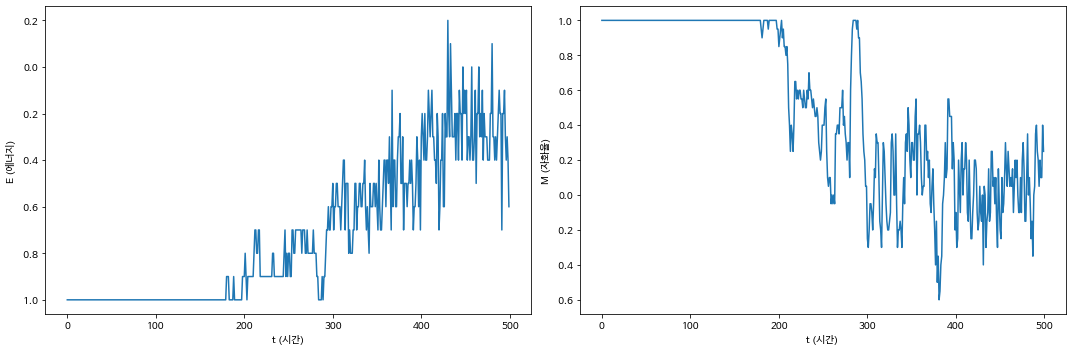

 < N = 80 >


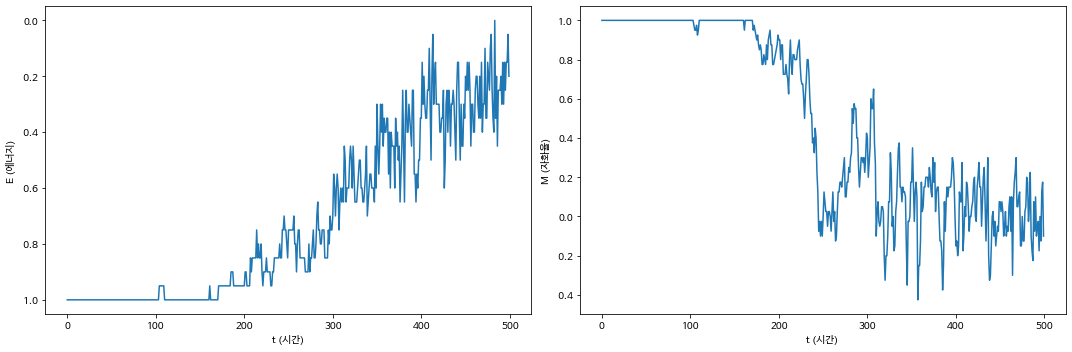

 < N = 160 >


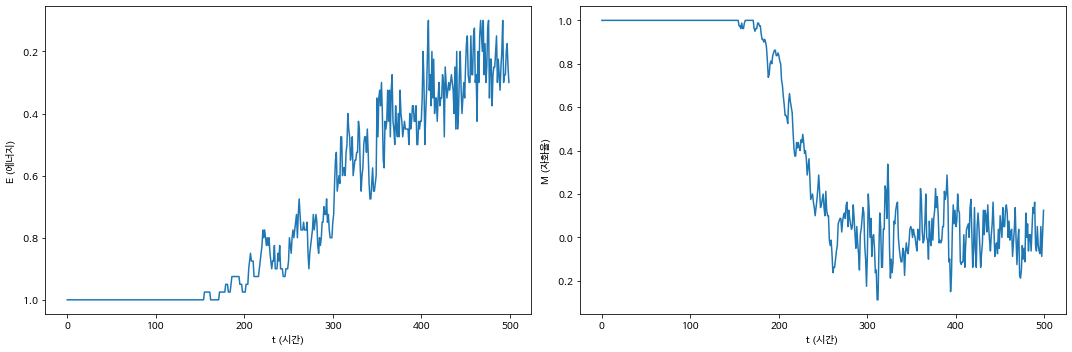

 < N = 320 >


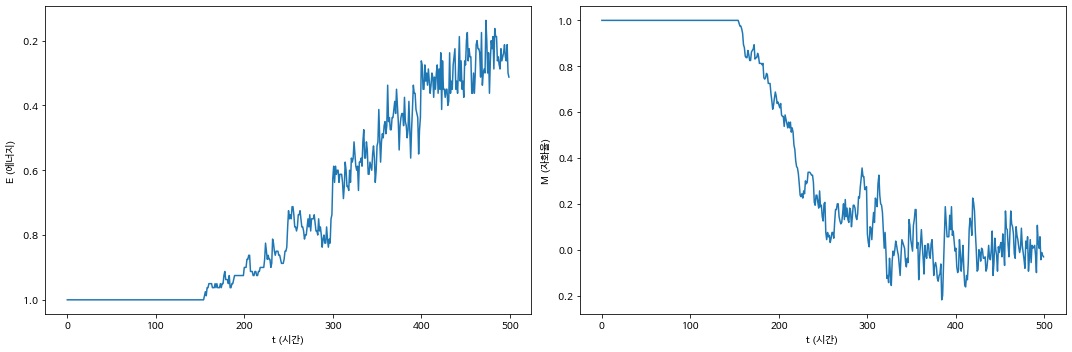

 < N = 640 >


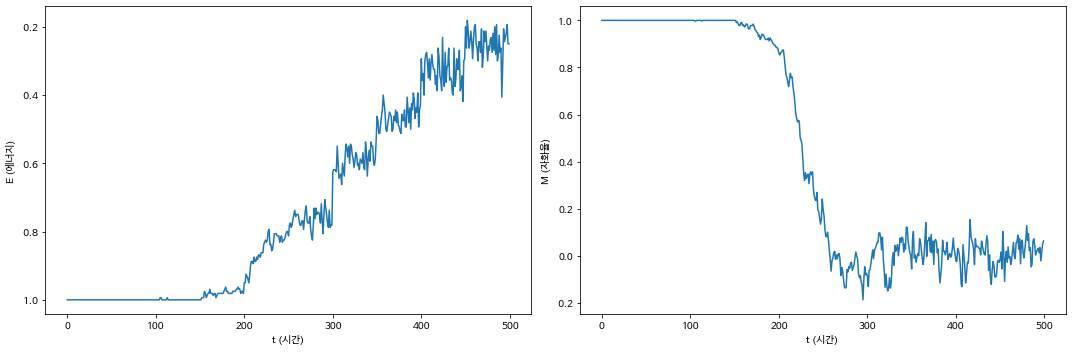

 < N = 1280 >


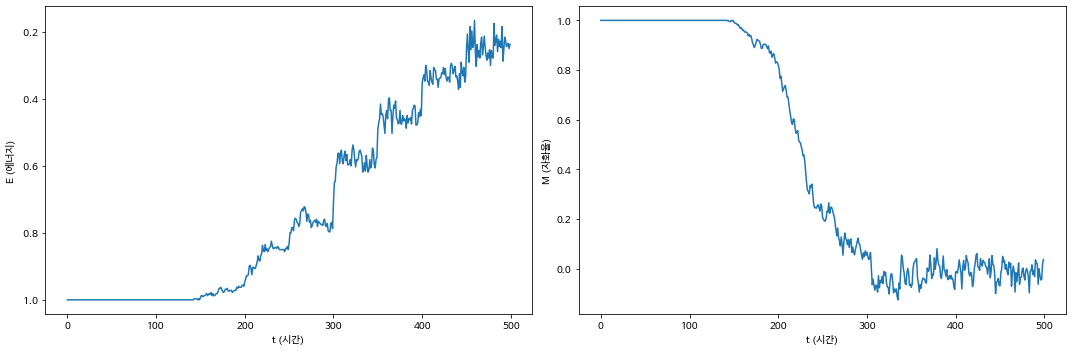

 < N = 2560 >


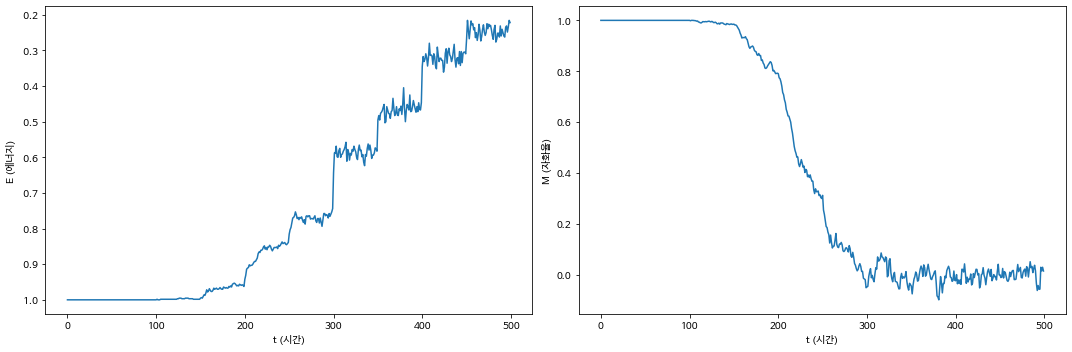

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

# 스핀 변화에 대한 확률 함수 !!
def proba(T):
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj)/T)
  return(p)

# 한 타임당 스핀이 변하게 하는 함수 !!
def change_spin(N):
  for n in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    if np.random.rand() < pflip[(s[i-1],s[i],s[iplus1])]:
      s[i] *= (-1)
  return()

# 입자당 에너지 계산 함수 !!
def calc_ene():
  sm = np.roll(s,1)  ### 배열 요소 굴리기 : 스핀 s 배열을 오른쪽으로 1번 굴린 배열 만들기
  sum_sisii = 0
  for i in range(len(s)):
    sum_sisii += s[i]*sm[i]
  H = (-1)*J*sum_sisii
  return(H/N)

# 자화율 계산 함수 !!
def calc_mag():
  sum_si = 0
  for i in range(len(s)):
    sum_si += s[i]
  return(sum_si/N)

# 초기 조건
J = 1
Nlist = [5,10,20,40,80,160,320,640,1280,2560]
Tlist = [0.1,0.2,0.4,0.6,0.8,1,1.5,2,3,4]
ene = [[] for i in range(len(Nlist))]   ### N별 입자당 에너지
mag = [[] for i in range(len(Nlist))]   ### N별 자화율

# 실행 !!
for n in range(len(Nlist)):
  N = Nlist[n]
#  s = (np.random.randint(2,size=N))*2-1   ### 온도 무한대에서 시작하는 초기 스핀 N개
  s = np.ones(N)   ### 온도 0에서 시작하는 초기 스핀 N개
  ene[n].append(calc_ene())   ### 시작할 때(t=0)의 입자당 에너지 저장
  mag[n].append(calc_mag())   ### 시작할 때(t=0)의 자화율 저장

  Tmax = 50; TempIndex = 0
  for t in range(1,Tmax*len(Tlist)):
    if t%Tmax == 0:
      TempIndex += 1
    T = Tlist[TempIndex]
    pflip = proba(T)   ### 온도에 따른 확률
    change_spin(N)   ### 확률에 따라 스핀(N번) 바꾸기 => 한 타임
    ene[n].append(calc_ene())   ### 입자당 에너지 저장
    mag[n].append(calc_mag())   ### 자화율 저장

# 그래프 그리기
time = [t for t in range(500)]  ### 시간은 0 ~ 300
for i in range(len(Nlist)):
  print('\033[1m','< N = %d >' %Nlist[i])
  fig, axs = plt.subplots(1,2, figsize=(15,5))
  axs[0].plot(time,ene[i])
  axs[0].set_xlabel('t (시간)')
  axs[0].set_ylabel('E (에너지)')
  axs[1].plot(time,mag[i])
  axs[1].set_xlabel('t (시간)')
  axs[1].set_ylabel('M (자화율)')
  plt.tight_layout()
  plt.show()

print('\033[0m')

*** $t_{eq}$와 $t_{mea}$ 찾기 !**

1. 계단 형식이 제일 잘 보이는 $N = 2560$일 때의 온도별로 변화하는 입자당 에너지와 자화율 확인

2. 온도가 변화할 때,

  평형 상태가 시작한 시간 = $t_{eq}$

  다음 온도로 변화하기 전까지 평형 상태가 유지되는 시간 = $t_{mea}$

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


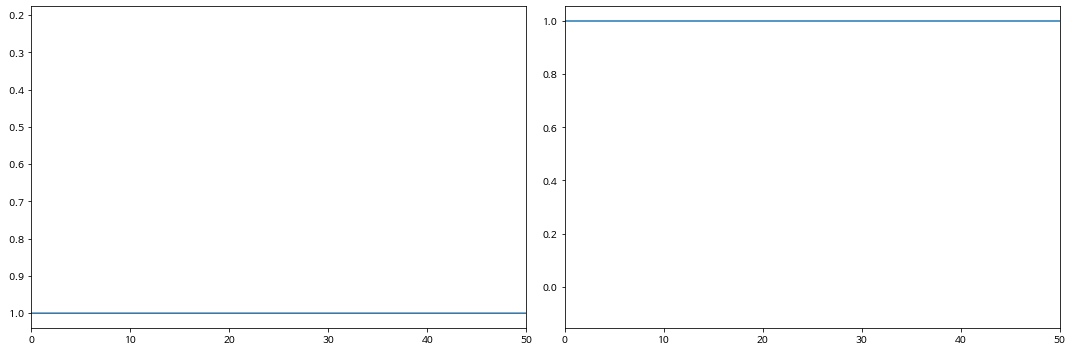

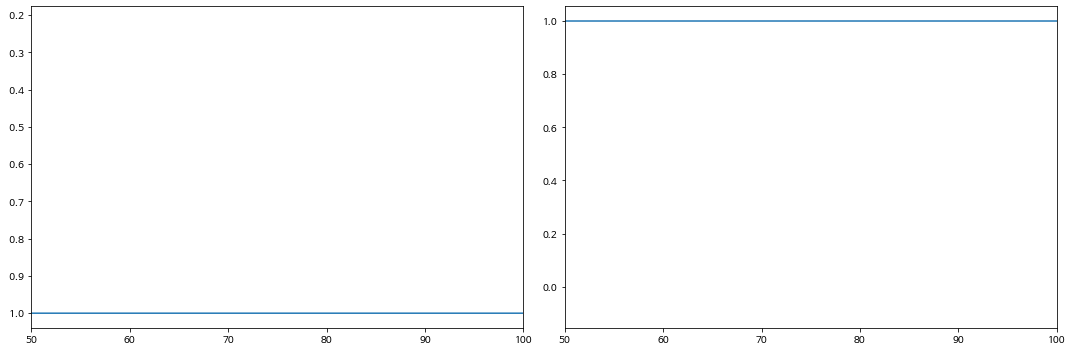

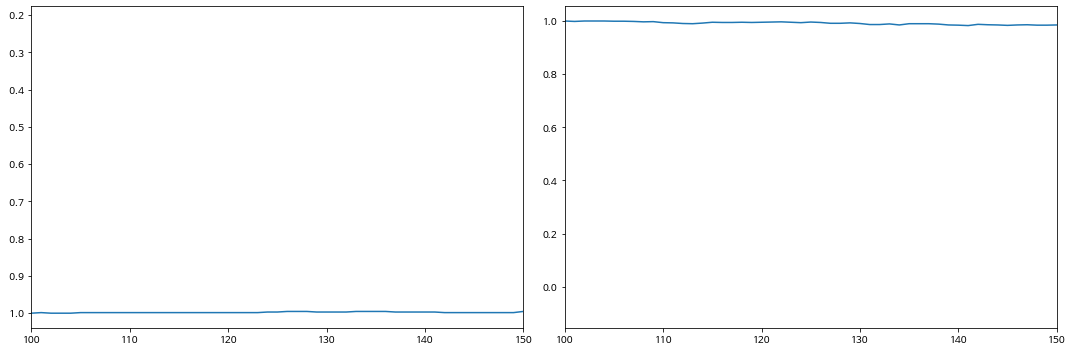

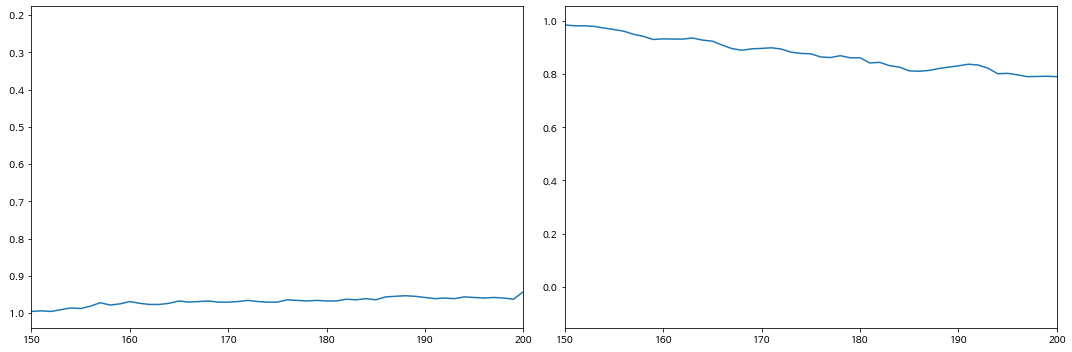

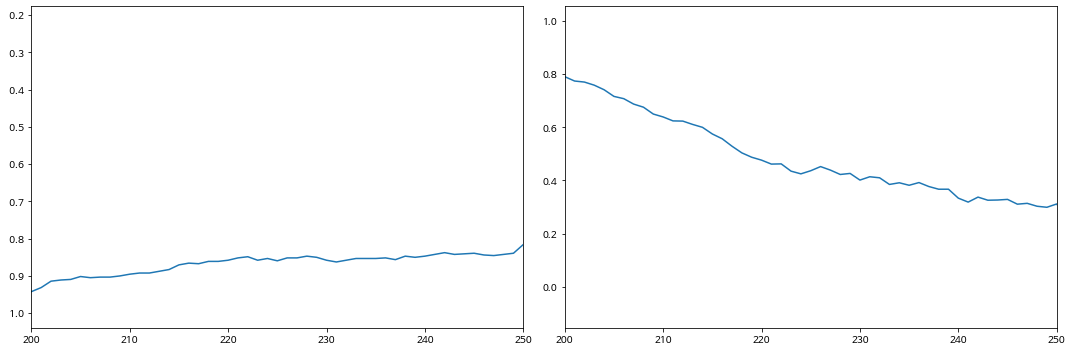

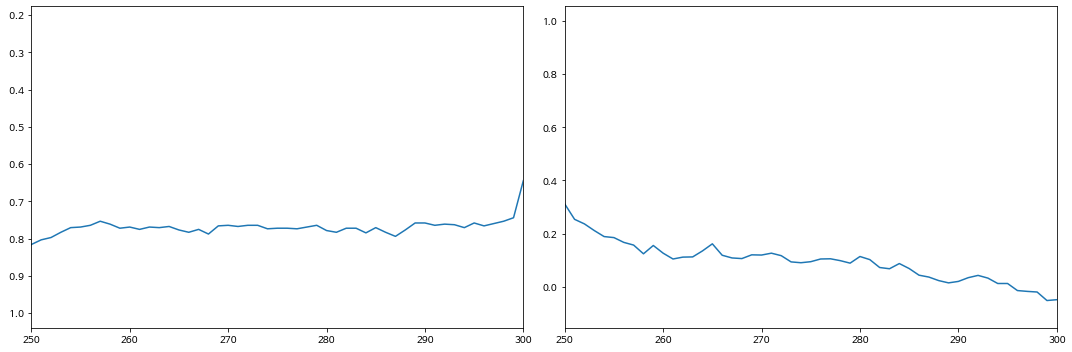

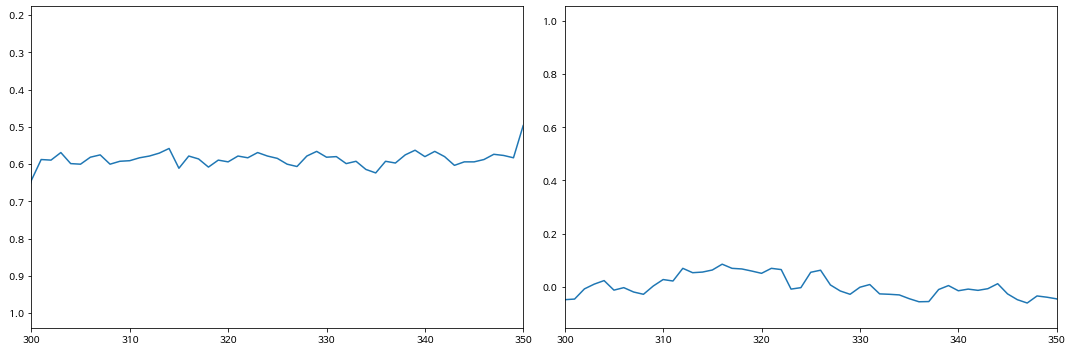

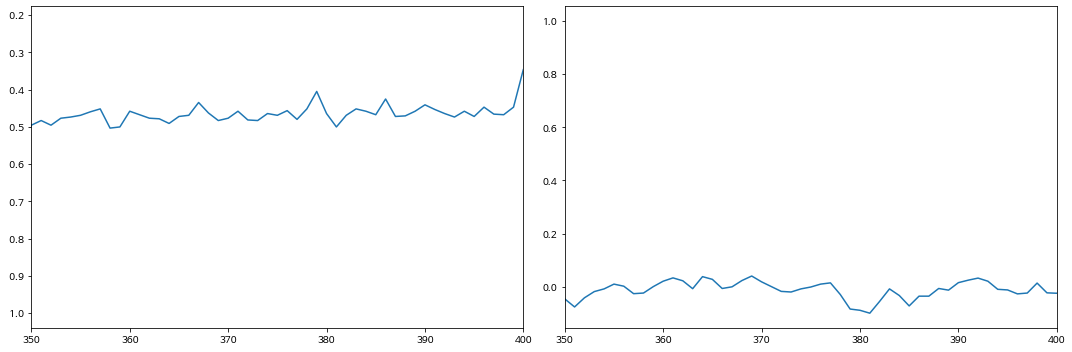

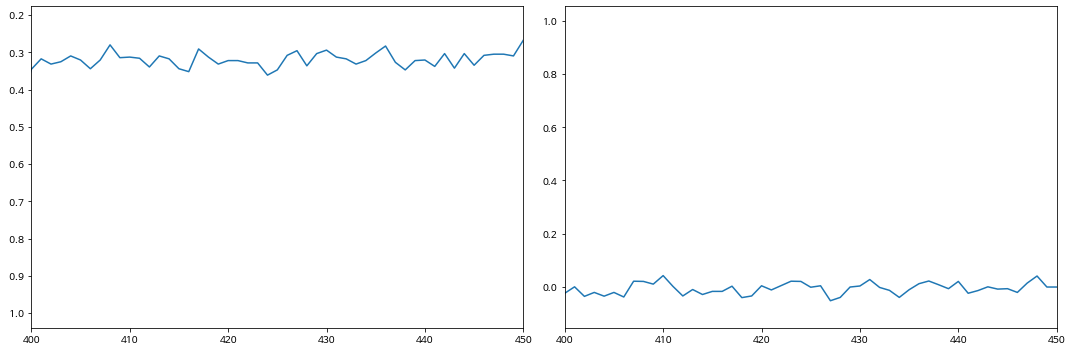

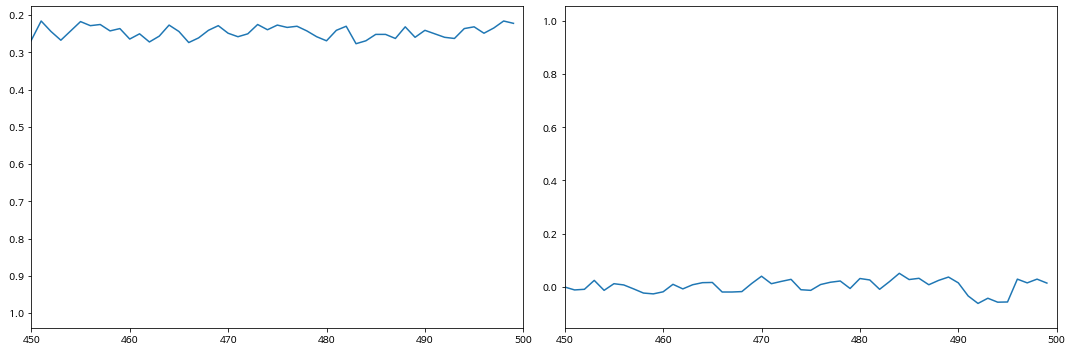

In [ ]:
# N = 2560일 때, t_eq와 t_mea 찾기
for i in range(len(Tlist)):
  fig, axs = plt.subplots(1,2, figsize=(15,5))
  axs[0].plot(time,ene[9])
  axs[0].set_xlim(i*50, (i+1)*50)
  axs[1].plot(time,mag[9])
  axs[1].set_xlim(i*50, (i+1)*50)
  plt.tight_layout()
  plt.show()

*** 온도별 평형 상태의 입자당 에너지와 자화율 계산하기 !**

1. 위에서 그린 그래프처럼 $t_{eq}$를 넉넉하게 30으로 잡고, $t_{mea}$를 20으로 잡는다.

2. 평형 상태의 입자당 에너지

  > $\epsilon(t) = \frac{1}{t_{mea}}\displaystyle\sum_{t=t_{eq}+1}^{t_{eq}+t_{mea}}\frac{E(t)}{N} $

3. 평형 상태의 자화율
  > $m(t) = \frac{1}{t_{mea}}\displaystyle\sum_{t=t_{eq}+1}^{t_{eq}+t_{mea}}M(t) $

4. 각 N마다, 온도별로 평형 상태의 입자당 에너지와 자화율을 그래프로 나타낸다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


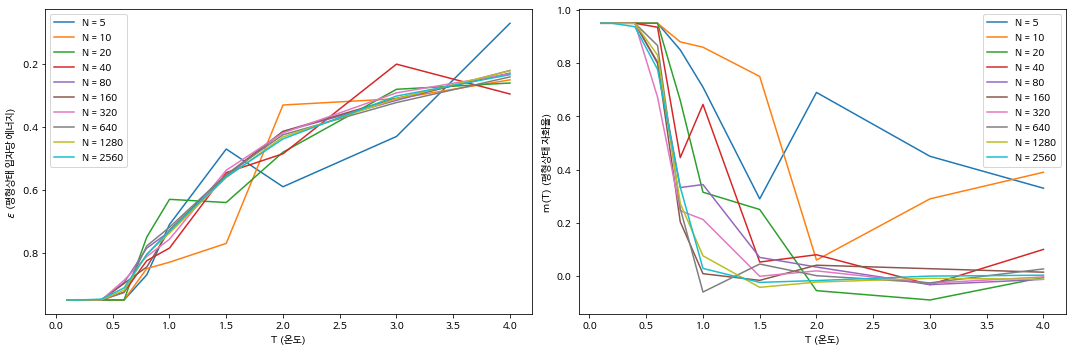

In [ ]:
Tmax = 50   ### 온도별 지속 시간
t_eq = 30   ### 평형상태가 되는 시간
t_mea = 20   ### 평형상태가 유지되는 시간
ene_eq = [[] for i in range(len(Nlist))]   ### N별 평형상태의 입자당 에너지 평균
mag_eq = [[] for i in range(len(Nlist))]   ### N별 평형상태의 자화율 평균

for n in range(len(Nlist)):
  for i in range(len(Tlist)):
    ene_sum = 0
    mag_sum = 0
    for t in range(((Tmax*i)+t_eq+1), ((Tmax*i)+t_eq+t_mea)):
      ene_sum += ene[n][t]
      mag_sum += mag[n][t]
    ene_eq[n].append(ene_sum/(t_mea))
    mag_eq[n].append(mag_sum/(t_mea))


# 그래프 그리기
fig, axs = plt.subplots(1,2, figsize=(15,5))
for i in range(len(Nlist)):
  axs[0].plot(Tlist,ene_eq[i])
  axs[1].plot(Tlist,mag_eq[i])
axs[0].legend(['N = 5','N = 10','N = 20','N = 40','N = 80','N = 160','N = 320','N = 640','N = 1280','N = 2560'])
axs[0].set_xlabel('T (온도)')
axs[0].set_ylabel('ε (평형상태 입자당 에너지)')
axs[1].legend(['N = 5','N = 10','N = 20','N = 40','N = 80','N = 160','N = 320','N = 640','N = 1280','N = 2560'])
axs[1].set_xlabel('T (온도)')
axs[1].set_ylabel('m(T) (평형상태 자화율)')
plt.tight_layout()
plt.show()




---



**(b)** N → ∞로 갈 때, $m(T_i)$값은 어떻게 될 지 예측하고, N = ∞에서 $m − T$ 그래프
개형 그려보기.

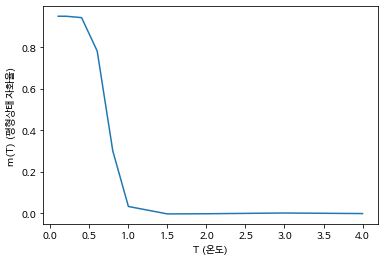

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

# 스핀 변화에 대한 확률 함수 !!
def proba(T):
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj)/T)
  return(p)

# 한 타임당 스핀이 변하게 하는 함수 !!
def change_spin(N):
  for n in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    if np.random.rand() < pflip[(s[i-1],s[i],s[iplus1])]:
      s[i] *= (-1)
  return()

# 자화율 계산 함수 !!
def calc_mag():
  sum_si = 0
  for i in range(len(s)):
    sum_si += s[i]
  return(sum_si/N)

# 초기 조건
J = 1
Tlist = [0.1,0.2,0.4,0.6,0.8,1,1.5,2,3,4]
mag = []   ### 자화율

# 실행 !!
N = 100000
s = np.ones(N)   ### 온도 0에서 시작하는 초기 스핀 N개
mag.append(calc_mag())   ### 시작할 때(t=0)의 자화율 저장

Tmax = 50; TempIndex = 0
for t in range(1,Tmax*len(Tlist)):
  if t%Tmax == 0:
    TempIndex += 1
  T = Tlist[TempIndex]
  pflip = proba(T)   ### 온도에 따른 확률
  change_spin(N)   ### 확률에 따라 스핀(N번) 바꾸기 => 한 타임
  mag.append(calc_mag())   ### 자화율 저장

# 평형 상태의 입자당 에너지 & 자화율
Tmax = 50   ### 온도별 지속 시간
t_eq = 30   ### 평형 상태가 되는 시간
t_mea = 20   ### 평형 상태가 유지되는 시간
mag_eq = []   ### 평형 상태의 자화율 평균

for i in range(len(Tlist)):
  mag_sum = 0
  for t in range(((Tmax*i)+t_eq+1), ((Tmax*i)+t_eq+t_mea)):
    mag_sum += mag[t]
  mag_eq.append(mag_sum/(t_mea))


# 그래프 그리기
plt.plot(Tlist,mag_eq)
plt.xlabel('T (온도)')
plt.ylabel('m(T) (평형상태 자화율)')
plt.show()


$N \rightarrow \infty$로 갈 때를 직접 그릴 수는 없으니, 위에서 했던 $N$보다 월등히 큰 $N = 100000$일 때의 그래프를 그려보았다.

$\Rightarrow$ N이 커질수록, 낮은 온도에서 평형상태의 자화율이 빠르게 0으로 변화가 되고, 0으로 유지된다.



---



**(a)의 보충 공부** : $R = 10$로 하여, Ensemble average 해보기

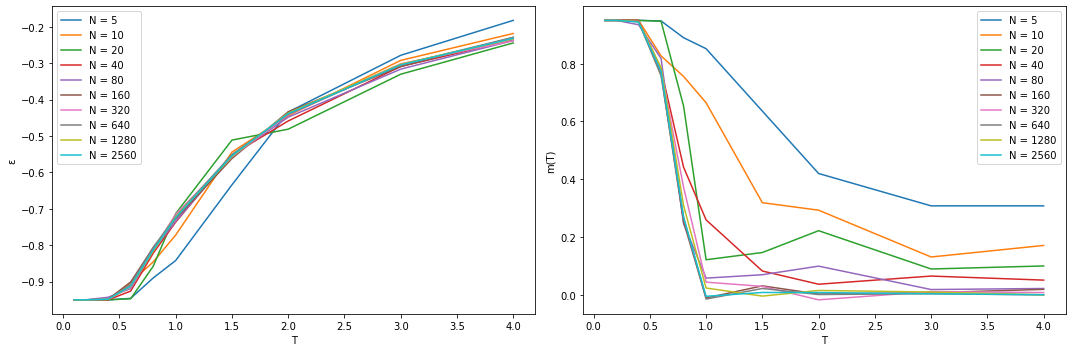

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

# 스핀 변화에 대한 확률 함수 !!
def proba(T):
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj)/T)
  return(p)

# 한 타임당 스핀이 변하게 하는 함수 !!
def change_spin(N):
  for n in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    if np.random.rand() < pflip[(s[i-1],s[i],s[iplus1])]:
      s[i] *= (-1)
  return()

# 입자당 에너지 계산 함수 !!
def calc_ene():
  sm = np.roll(s,1)  ### 배열 요소 굴리기 : 스핀 s 배열을 오른쪽으로 1번 굴린 배열 만들기
  sum_sisii = 0
  for i in range(len(s)):
    sum_sisii += s[i]*sm[i]
  H = (-1)*J*sum_sisii
  return(H/N)

# 자화율 계산 함수 !!
def calc_mag():
  sum_si = 0
  for i in range(len(s)):
    sum_si += s[i]
  return(sum_si/N)

# 초기 조건
J = 1
R = 10   ### 실행 횟수
Nlist = [5,10,20,40,80,160,320,640,1280,2560]
Tlist = [0.1,0.2,0.4,0.6,0.8,1,1.5,2,3,4]
ene = [[[] for i in range(len(Nlist))] for r in range(R)]   ### N별 입자당 에너지
mag = [[[] for i in range(len(Nlist))] for r in range(R)]   ### N별 자화율

# 실행 !!
for r in range(R):
  for n in range(len(Nlist)):
    N = Nlist[n]
    s = np.ones(N)   ### 온도 0에서 시작하는 초기 스핀 N개
    ene[r][n].append(calc_ene())   ### 시작할 때(t=0)의 입자당 에너지 저장
    mag[r][n].append(calc_mag())   ### 시작할 때(t=0)의 자화율 저장

    Tmax = 50; TempIndex = 0
    for t in range(1,Tmax*len(Tlist)):
      if t%Tmax == 0:
        TempIndex += 1
      T = Tlist[TempIndex]
      pflip = proba(T)   ### 온도에 따른 확률
      change_spin(N)   ### 확률에 따라 스핀(N번) 바꾸기 => 한 타임
      ene[r][n].append(calc_ene())   ### 입자당 에너지 저장
      mag[r][n].append(calc_mag())   ### 자화율 저장


Tmax = 50   ### 온도별 지속 시간
t_eq = 30   ### 평형상태가 되는 시간
t_mea = 20   ### 평형상태가 유지되는 시간
ene_eq = [[[] for i in range(len(Nlist))] for r in range(R)]   ### N별 평형상태의 입자당 에너지 평균
mag_eq = [[[] for i in range(len(Nlist))] for r in range(R)]   ### N별 평형상태의 자화율 평균

for r in range(R):
  for n in range(len(Nlist)):
    for i in range(len(Tlist)):
      ene_sum = 0
      mag_sum = 0
      for t in range(((Tmax*i)+t_eq+1), ((Tmax*i)+t_eq+t_mea)):
        ene_sum += ene[r][n][t]
        mag_sum += mag[r][n][t]
      ene_eq[r][n].append(ene_sum/(t_mea))
      mag_eq[r][n].append(mag_sum/(t_mea))


ensamble_ene = [[] for i in range(len(Nlist))]
ensamble_mag = [[] for i in range(len(Nlist))]
for n in range(len(Nlist)):
  for i in range(len(Tlist)):
    ensamble_ene_sum = 0
    ensamble_mag_sum = 0
    for r in range(R):
      ensamble_ene_sum += ene_eq[r][n][i]
      ensamble_mag_sum += mag_eq[r][n][i]
    ensamble_ene[n].append(ensamble_ene_sum/R)
    ensamble_mag[n].append(ensamble_mag_sum/R)

# 그래프 그리기
fig, axs = plt.subplots(1,2, figsize=(15,5))
for i in range(len(Nlist)):
  axs[0].plot(Tlist,ensamble_ene[i])
  axs[1].plot(Tlist,ensamble_mag[i])
axs[0].legend(['N = 5','N = 10','N = 20','N = 40','N = 80','N = 160','N = 320','N = 640','N = 1280','N = 2560'])
axs[0].set_xlabel('T') ### 온도
axs[0].set_ylabel('ε')   ### 평형상태 입자당 에너지
axs[1].legend(['N = 5','N = 10','N = 20','N = 40','N = 80','N = 160','N = 320','N = 640','N = 1280','N = 2560'])
axs[1].set_xlabel('T')   ### 온도
axs[1].set_ylabel('m(T)')   ### 평형상태 자화율
plt.tight_layout()
plt.show()




---




***. 코랩에서 한글 폰트 적용하기 !

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq



In [ ]:
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()